# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [79]:
NUM_POINTS = 1500    # DEBUG 1500

# Set the API base URL
BASE_URL = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS )
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS )
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [93]:
#checking code with one city
city_weather = requests.get(BASE_URL+'city').json()

In [5]:
#checking time code
# time.ctime(city_weather['dt'])

'Tue Aug 20 16:40:40 2024'

In [94]:
city_weather['dt']

1724289901

In [95]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san felipe
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | belyy yar
Processing Record 4 of Set 1 | nogliki
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | ubinskoye
Processing Record 8 of Set 1 | bikenibeu village
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | albion
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | ukmerge
Processing Record 19 of Set 1 | road town
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | crane
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Se

In [96]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san felipe,10.3399,-68.7425,21.84,100,13,0.56,VE,1724289910
1,acarau,-2.8856,-40.1200,25.40,84,1,8.33,BR,1724289843
2,belyy yar,53.6039,91.3903,15.94,94,0,1.00,RU,1724289910
3,nogliki,51.8333,143.1667,21.51,69,100,6.57,RU,1724289910
4,albany,42.6001,-73.9662,14.26,79,6,2.24,US,1724289910
...,...,...,...,...,...,...,...,...,...
575,deqen,29.9618,90.7188,10.70,76,69,1.50,CN,1724289949
576,san julian,21.0167,-102.1667,19.42,61,97,3.30,MX,1724289949
577,gao,16.6362,1.6370,31.80,47,23,5.34,ML,1724289949
578,konosha,60.9736,40.2570,9.59,85,77,1.61,RU,1724289950


In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [98]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san felipe,10.3399,-68.7425,21.84,100,13,0.56,VE,1724289910
1,acarau,-2.8856,-40.1200,25.40,84,1,8.33,BR,1724289843
2,belyy yar,53.6039,91.3903,15.94,94,0,1.00,RU,1724289910
3,nogliki,51.8333,143.1667,21.51,69,100,6.57,RU,1724289910
4,albany,42.6001,-73.9662,14.26,79,6,2.24,US,1724289910


In [99]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [100]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san felipe,10.3399,-68.7425,21.84,100,13,0.56,VE,1724289910
1,acarau,-2.8856,-40.1200,25.40,84,1,8.33,BR,1724289843
2,belyy yar,53.6039,91.3903,15.94,94,0,1.00,RU,1724289910
3,nogliki,51.8333,143.1667,21.51,69,100,6.57,RU,1724289910
4,albany,42.6001,-73.9662,14.26,79,6,2.24,US,1724289910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [107]:
from datetime import datetime

# Unix timestamp
timestamp = 1723248000

# Convert Unix timestamp to datetime object
datetime_object = datetime.fromtimestamp(timestamp)

# Print the datetime object
print(datetime_object)


2024-08-09 17:00:00


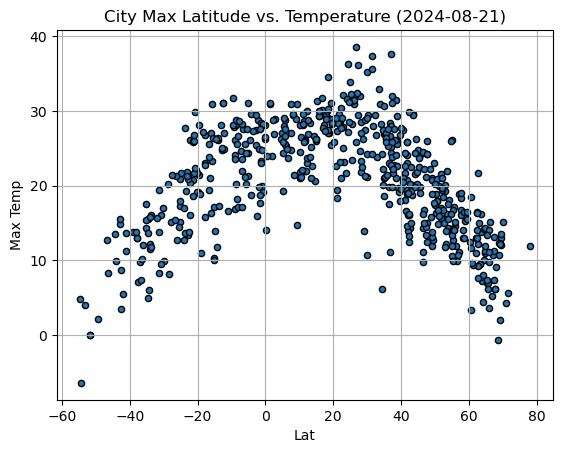

In [111]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
city_data_df.plot.scatter(
    'Lat',
    'Max Temp', 
    grid=True, 
    edgecolor='black', 
    title="City Max Latitude vs. Temperature (" + str(datetime.today().date()) + ")"
)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

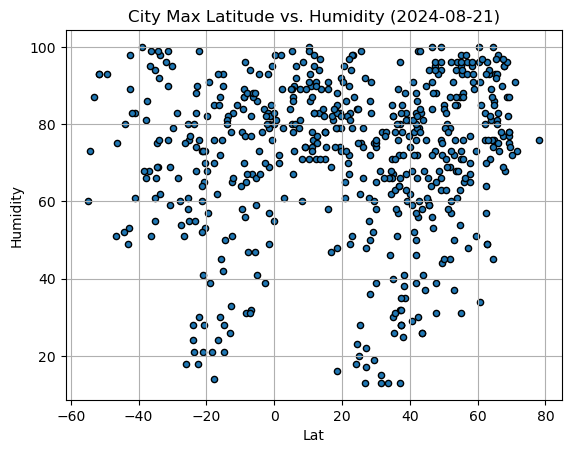

In [112]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties
city_data_df.plot.scatter(
    'Lat',
    'Humidity', 
    grid=True, 
    edgecolor='black', 
    title="City Max Latitude vs. Humidity (" + str(datetime.today().date()) + ")"
)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

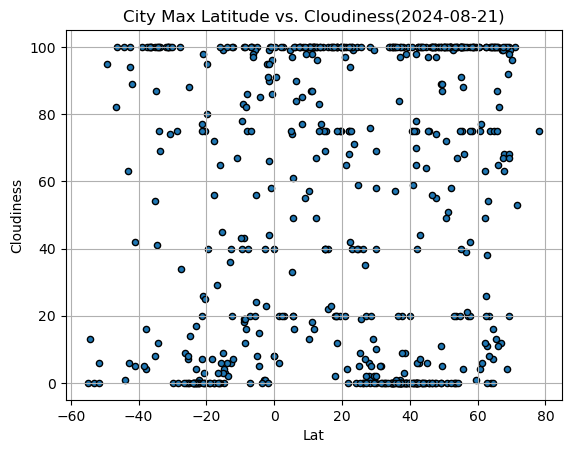

In [113]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
city_data_df.plot.scatter(
    'Lat',
    'Cloudiness', 
    grid=True, 
    edgecolor='black', 
    title="City Max Latitude vs. Cloudiness(" + str(datetime.today().date()) + ")"
)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

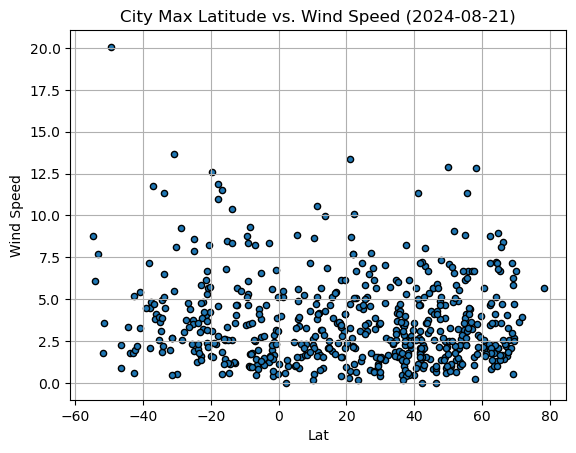

In [114]:
# Build the scatter plots for latitude vs. wind speed

# Incorporate the other graph properties
city_data_df.plot.scatter(
    'Lat',
    'Wind Speed', 
    grid=True, 
    edgecolor='black', 
    title="City Max Latitude vs. Wind Speed (" + str(datetime.today().date()) + ")"
)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots

def lr(x_values,y_values):
    return linregress(x_values, y_values)



In [116]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san felipe,10.3399,-68.7425,21.84,100,13,0.56,VE,1724289910
2,belyy yar,53.6039,91.3903,15.94,94,0,1.00,RU,1724289910
3,nogliki,51.8333,143.1667,21.51,69,100,6.57,RU,1724289910
4,albany,42.6001,-73.9662,14.26,79,6,2.24,US,1724289910
5,bilibino,68.0546,166.4372,9.05,68,100,2.59,RU,1724289844


In [117]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,acarau,-2.8856,-40.1200,25.40,84,1,8.33,BR,1724289843
8,grytviken,-54.2811,-36.5092,-6.44,73,13,6.08,GS,1724289910
9,waitangi,-43.9535,-176.5597,9.90,80,1,1.79,NZ,1724289844
10,mahebourg,-20.4081,57.7000,22.16,53,75,8.23,MU,1724289844
21,port-aux-francais,-49.3500,70.2167,2.13,93,95,20.06,TF,1724289911


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.5498402804445156, The R value is: -0.7415121579883337


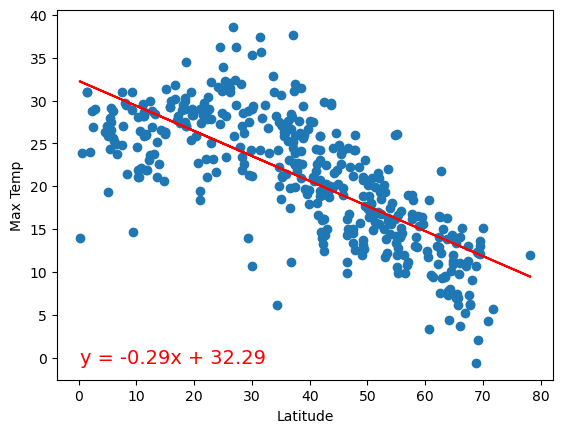

In [118]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(min(x_values), min(y_values)), fontsize=14, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()


R squared: 0.5836007246978487 , The R value is: 0.7639376445089276


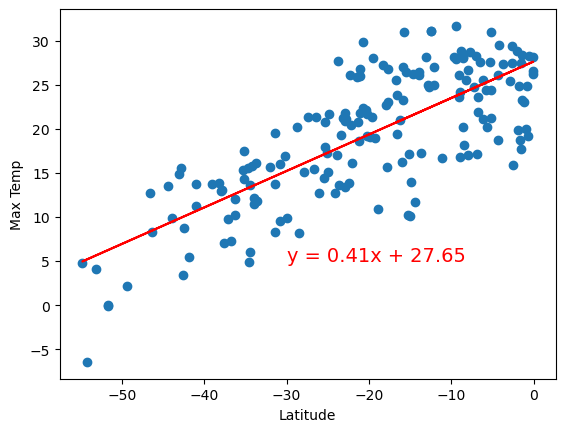

In [119]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=14,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2} , The R value is: {rvalue}")

# Show plot
plt.show()

 **Discussion about the linear relationship:** The R value for the northern hemisphere is negative. A negative r-value indicates a negative correlation between the two variables (Temp and Latitude). This means that as one variable increases, the other variable tends to decrease.
 The R valuse for the southern hemisphere is positive.A positive r-value indicates a strong positive correlation between the two variables(Temp and Latitude). This means that as one variable increases, the other variable also tends to increase.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0002057783367811993, The R value is: 0.014344976011872564


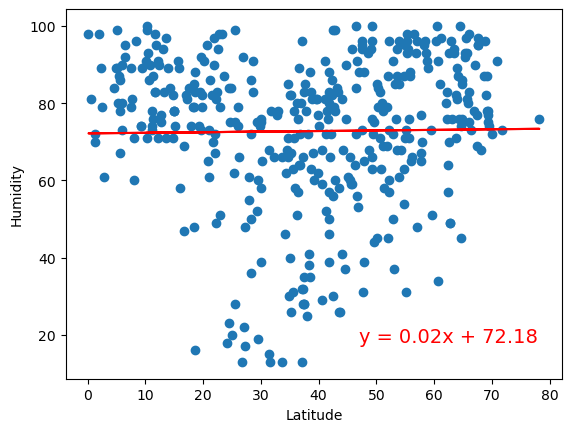

In [120]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.annotate(line_eq, xy=(max(x_values) * 0.6, min(y_values) * 1.4), fontsize=14, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()


R squared: 0.006117724023424118, The R value is: -0.0782158808901627


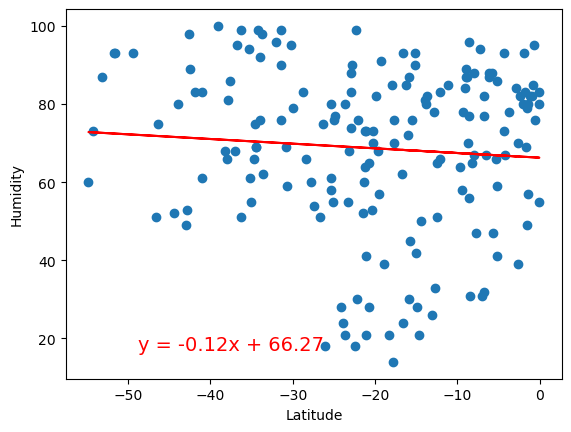

In [121]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(min(x_values) + 6, min(y_values) + 3), fontsize=14, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 
The R value for the northern hemisphere is positive but very close to zero. The R valuse for the southern hemisphere is negative but also close to zero indicating that there is almost no correlation between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 4.100093954310425e-05, The R value is: 0.006403197603003069


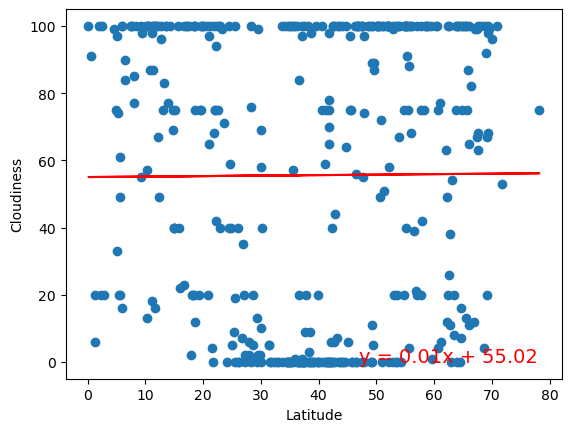

In [122]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.annotate(line_eq, xy=(max(x_values) * 0.6, min(y_values) * 1.4), fontsize=14, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()

R squared: 3.7004248270863124e-05, The R value is: -0.006083111725988856


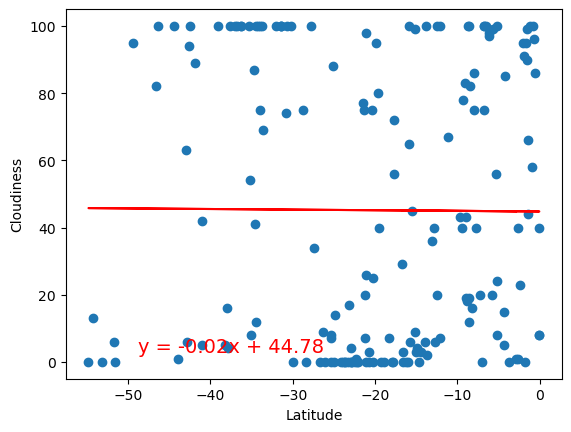

In [123]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(min(x_values) + 6, min(y_values) + 3), fontsize=14, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The R value for the northern hemisphere is positive but very close to zero. The R valuse for the southern hemisphere is negative but also very close to zero indicating that there is almost no correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0028272665445104013, The R value is: 0.053172046645868366


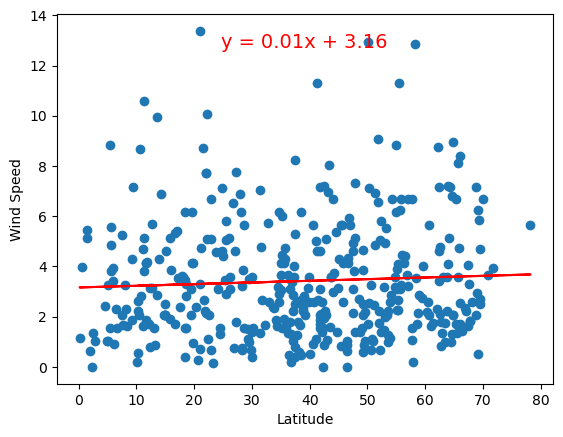

In [124]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.annotate(line_eq, xy=(max(x_values) * 0.5, max(y_values) * 0.95), fontsize=14, color="red", ha='center')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()


R squared: 0.03644240824706136, The R value is: -0.19089894773691488


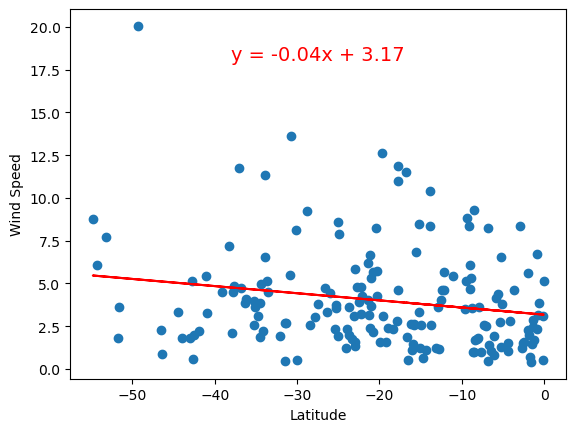

In [125]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lr(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot scatter plot
plt.scatter(x_values, y_values, alpha=1)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0.5 * (min(x_values) + max(x_values)), max(y_values) * 0.9),
             fontsize=14, color="red", ha='center')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value
print(f"R squared: {rvalue**2}, The R value is: {rvalue}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The R value for the northern hemisphere is positive but very close to zero indicating that there is almost no correlation between the two variables.The R value for the southern hemisphere is negative but slightly above zero indicating that there is a very weak negative correlation between the two variables.